In [ ]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [ ]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

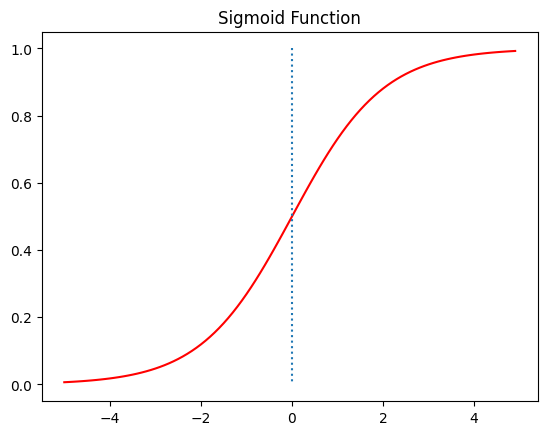

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'r')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

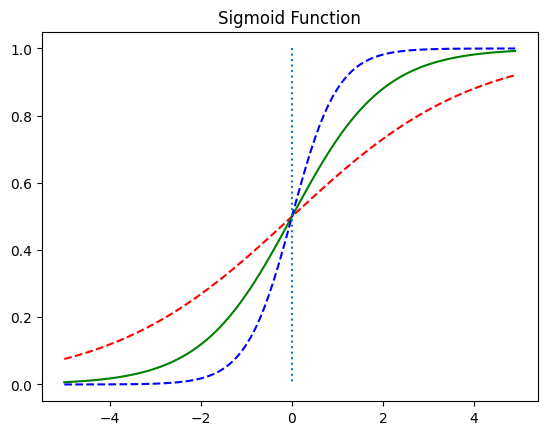

In [ ]:
#Weight가 그래프의 기울기 조절

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

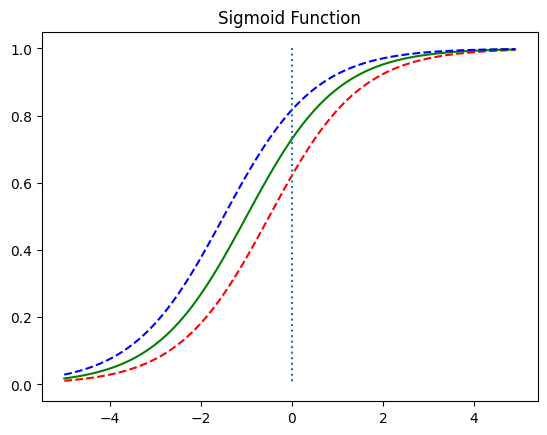

In [ ]:
#Bias 그래프 좌우 평행이동

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

In [ ]:
##########################################

# Sigmoid함수의 결과값을 가지고 그냥 이전에 사용하였던
# Mean Square Error와 같은 cost함수를 사용하면
# 심한 비 볼록(non-convex)함수의 형태를 가지게 된다
# Global Minimum이 아닌 Local Minimum에 도달할 확률 높음

# Log함수의 형태 사용 ==> Entropy!
# Cost(H(x),y) = -[y*logH(x)+(1-y)log(1-H(x))]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [ ]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [ ]:
optimizer = optim.SGD([W, b], lr=1)

Epoch    0/1000 Cost: 0.003009


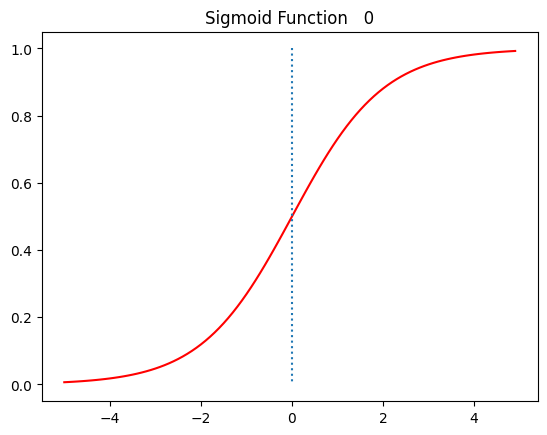

tensor([[5.1188],
        [2.4788]], requires_grad=True) tensor([-22.9658], requires_grad=True)
Epoch  100/1000 Cost: 0.002968
Epoch  200/1000 Cost: 0.002927
Epoch  300/1000 Cost: 0.002888
Epoch  400/1000 Cost: 0.002850
Epoch  500/1000 Cost: 0.002812


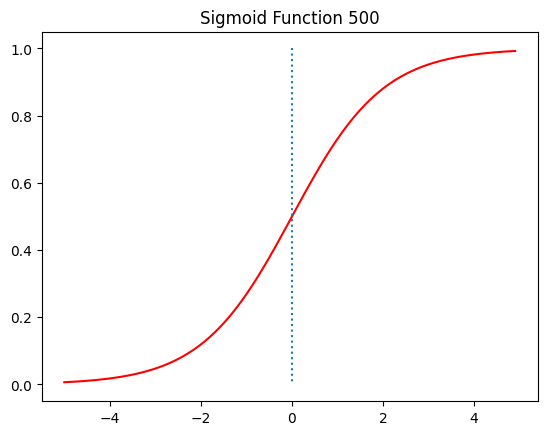

tensor([[5.1862],
        [2.5128]], requires_grad=True) tensor([-23.2701], requires_grad=True)
Epoch  600/1000 Cost: 0.002776
Epoch  700/1000 Cost: 0.002741
Epoch  800/1000 Cost: 0.002706
Epoch  900/1000 Cost: 0.002673
Epoch 1000/1000 Cost: 0.002640


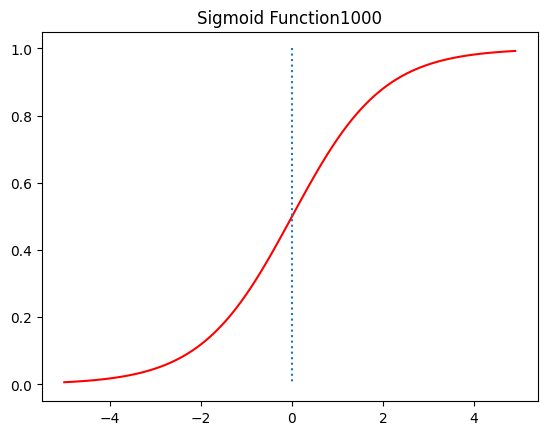

tensor([[5.2494],
        [2.5446]], requires_grad=True) tensor([-23.5551], requires_grad=True)


In [ ]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) +
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))
        if epoch % 500 ==0:
          x = np.arange(-5.0, 5.0, 0.1)
          y = sigmoid(x)

          plt.plot(x, y, 'r')
          plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
          plt.title('Sigmoid Function{:4d}'.format(epoch))
          plt.show()
          print(W,b)

In [ ]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[1.8201e-06],
        [4.3961e-03],
        [5.1563e-03],
        [9.9379e-01],
        [9.9997e-01],
        [1.0000e+00]], grad_fn=<SigmoidBackward0>)
tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
